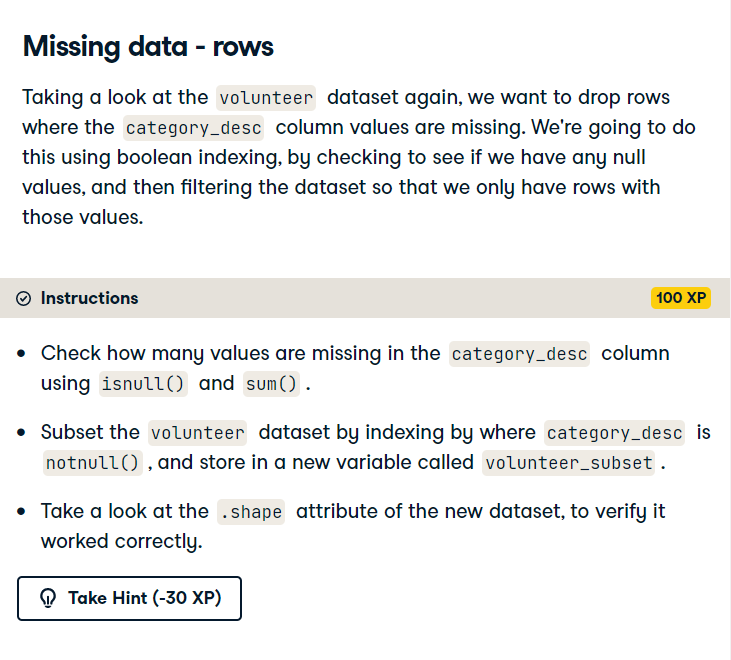

In [ ]:
# Check how many values are missing in the category_desc column
print(volunteer["category_desc"].isnull().sum())

# Subset the volunteer dataset
volunteer_subset = volunteer[volunteer["category_desc"].notnull()]

# Print out the shape of the subset
print(volunteer_subset.shape)

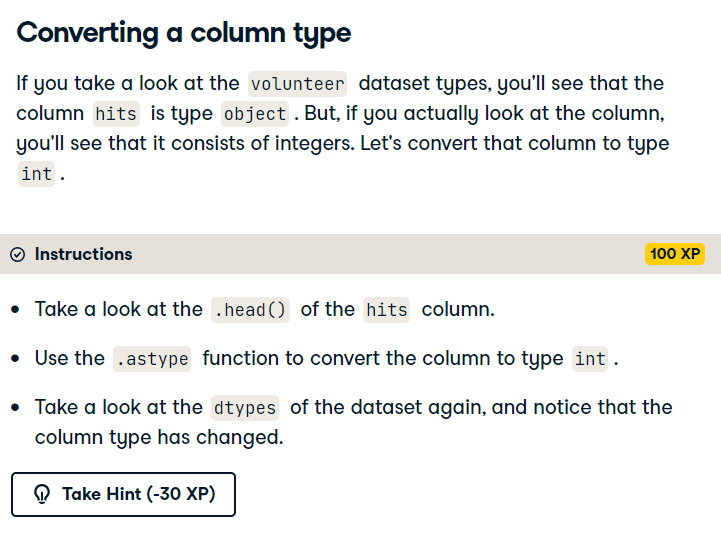

In [ ]:
# Print the head of the hits column
print(volunteer["hits"].head())

# Convert the hits column to type int
volunteer["hits"] = volunteer["hits"].astype("int")

# Look at the dtypes of the dataset
print(volunteer.dtypes)

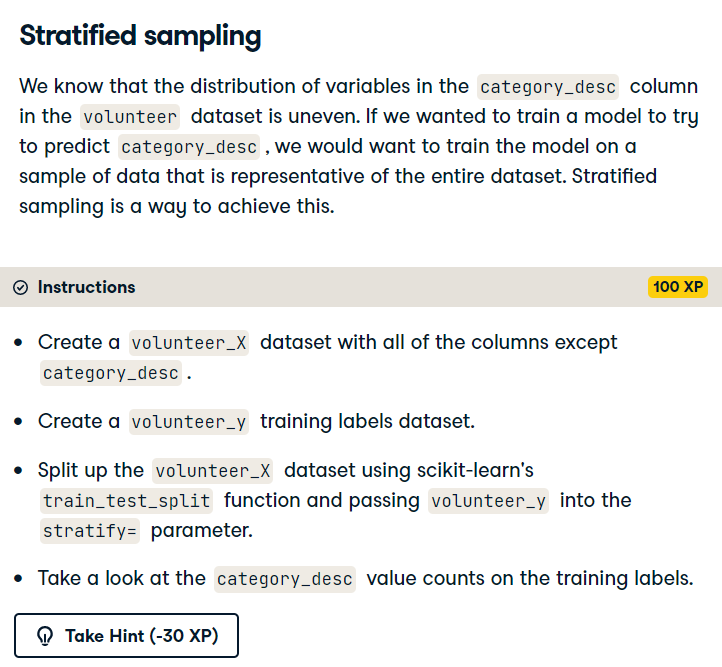

In [ ]:
# Create a data with all columns except category_desc
volunteer_X = volunteer.drop("category_desc", axis=1)

# Create a category_desc labels dataset
volunteer_y = volunteer[["category_desc"]]

# Use stratified sampling to split up the dataset according to the volunteer_y dataset
X_train, X_test, y_train, y_test = train_test_split(volunteer_X, volunteer_y, stratify=volunteer_y)

# Print out the category_desc counts on the training y labels
print(y_train["category_desc"].value_counts())

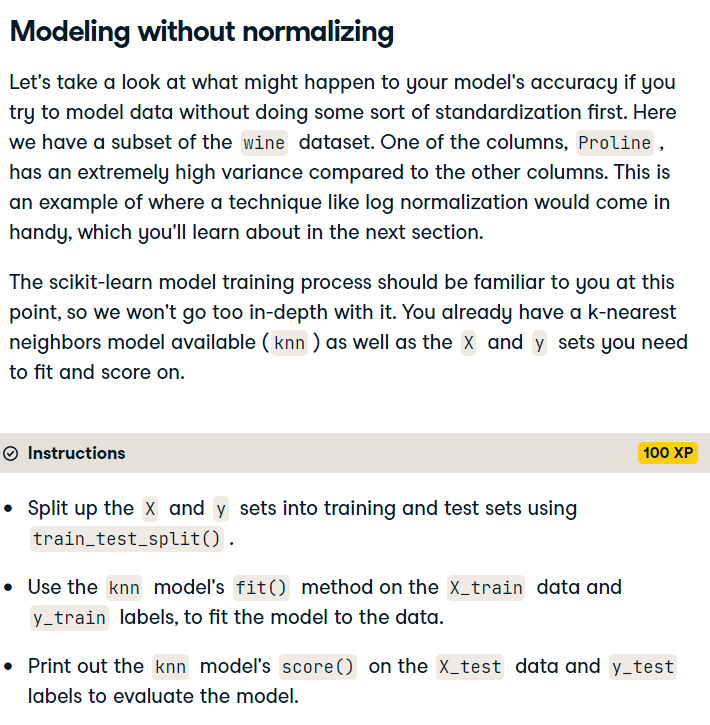

In [ ]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

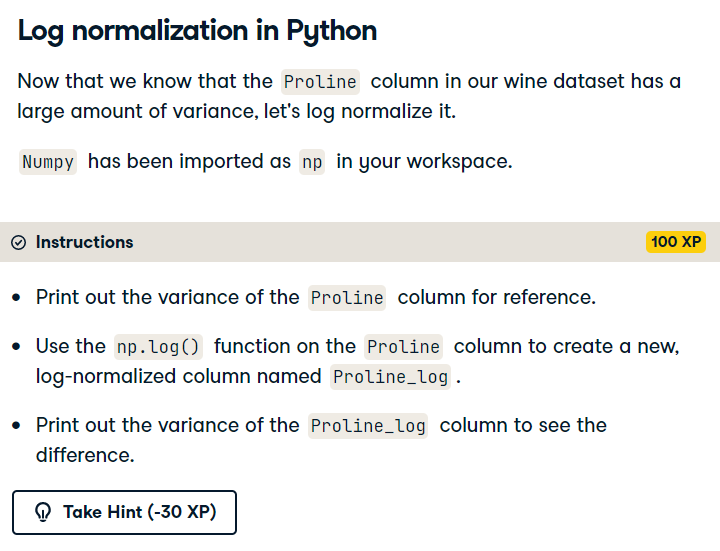

In [ ]:
# Print out the variance of the Proline column
print(wine["Proline"].var())

# Apply the log normalization function to the Proline column
wine["Proline_log"] = np.log(wine["Proline"])

# Check the variance of the normalized Proline column
print(wine["Proline_log"].var())

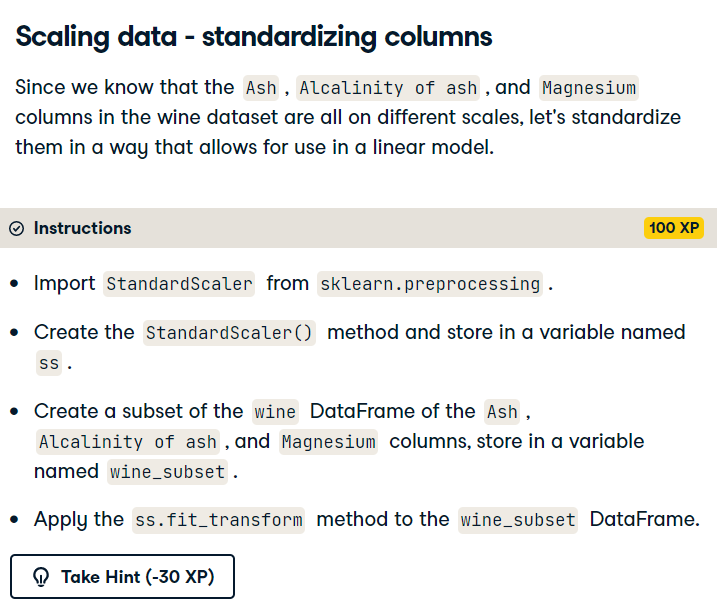

In [ ]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create the scaler
ss = StandardScaler()

# Take a subset of the DataFrame you want to scale
wine_subset = wine[['Ash', 'Alcalinity of ash', 'Magnesium']]

# Apply the scaler to the DataFrame subset
wine_subset_scaled = ss.fit_transform(wine_subset)


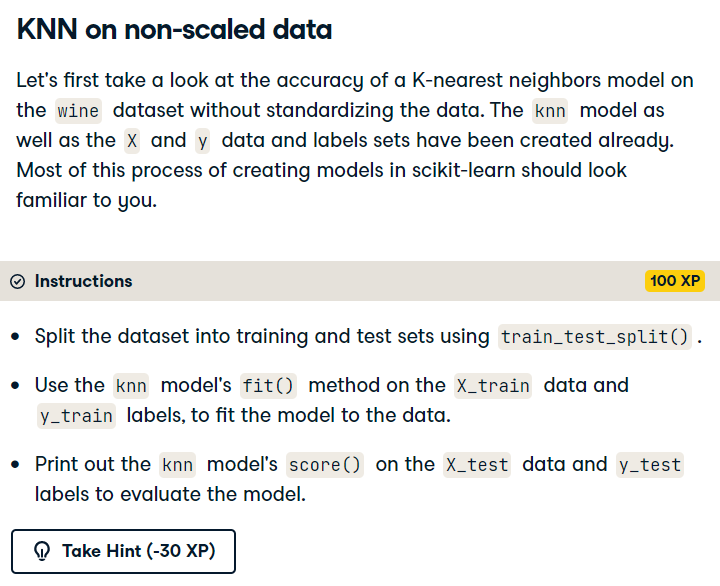

In [ ]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

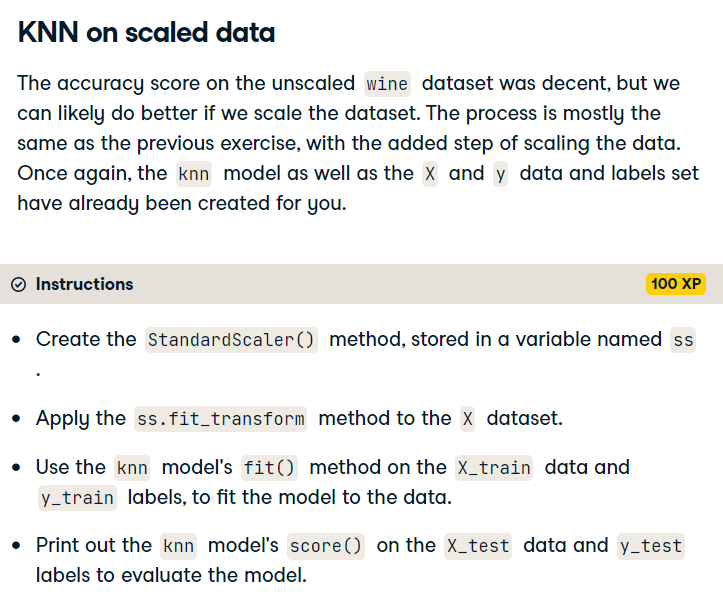

In [ ]:
# Create the scaling method.
ss = StandardScaler()

# Apply the scaling method to the dataset used for modeling.
X_scaled = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

# Fit the k-nearest neighbors model to the training data.
knn.fit(X_train, y_train)

# Score the model on the test data.
print(knn.score(X_test, y_test))

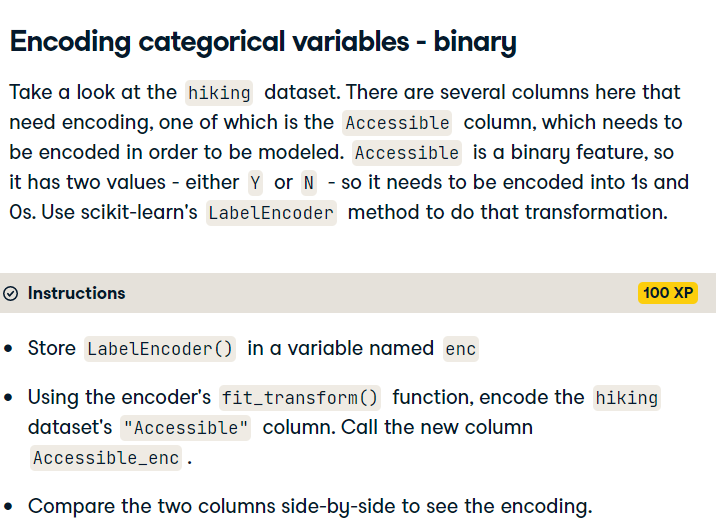

In [ ]:
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
hiking["Accessible_enc"] = enc.fit_transform(hiking["Accessible"])

# Compare the two columns
print(hiking[["Accessible_enc", "Accessible"]].head())

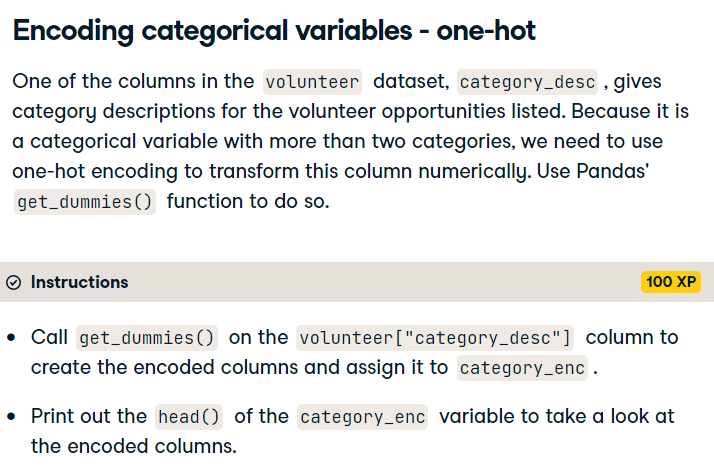

In [ ]:
# Transform the category_desc column
category_enc = pd.get_dummies(volunteer["category_desc"])

# Take a look at the encoded columns
print(category_enc.head())

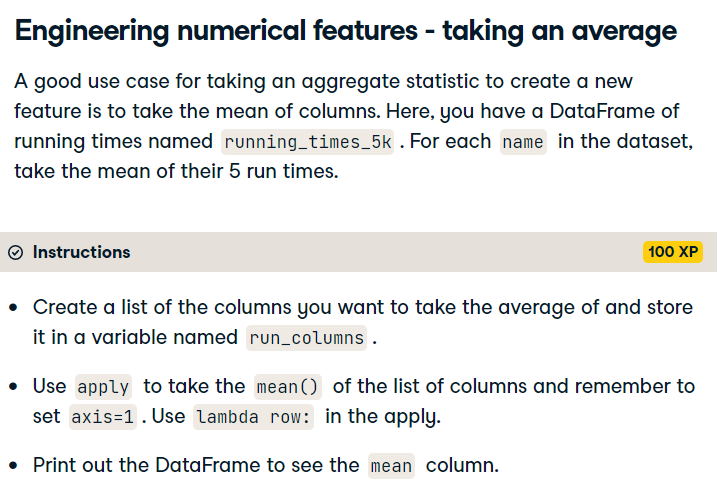

In [ ]:
# Create a list of the columns to average
run_columns = ["run1", "run2", "run3", "run4", "run5"]

# Use apply to create a mean column
running_times_5k["mean"] = running_times_5k.apply(lambda row: row[run_columns].mean(), axis=1)

# Take a look at the results
print(running_times_5k)

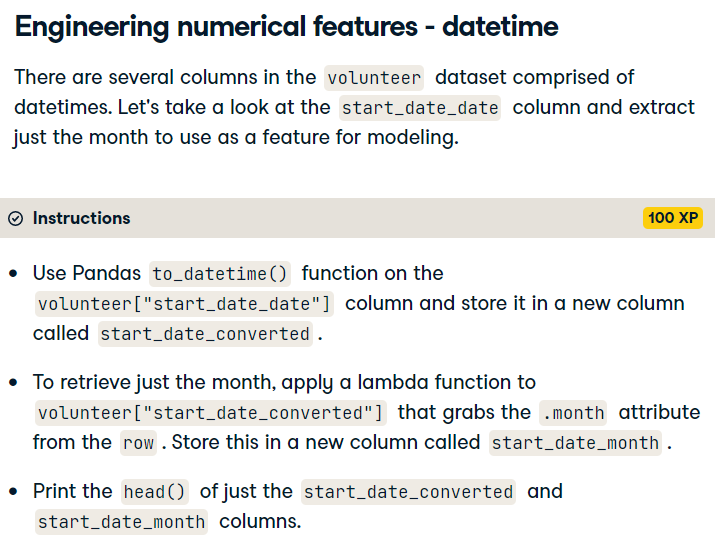

In [ ]:
# First, convert string column to date column
volunteer["start_date_converted"] = pd.to_datetime(volunteer["start_date_date"])

# Extract just the month from the converted column
volunteer["start_date_month"] = volunteer["start_date_converted"].apply(lambda row: row.month)

# Take a look at the converted and new month columns
print(volunteer[["start_date_converted", "start_date_month"]].head())

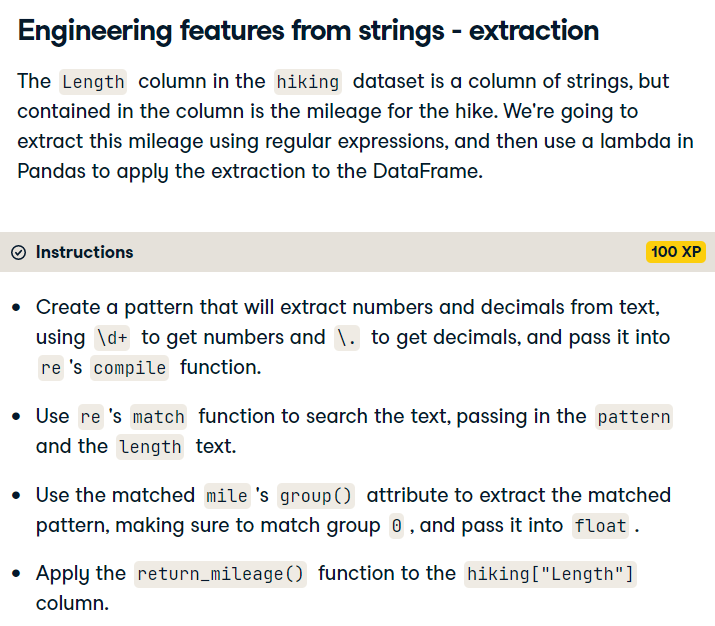

In [ ]:
# Write a pattern to extract numbers and decimals
def return_mileage(length):
    pattern = re.compile(r"\d+\.\d+")

    # Search the text for matches
    mile = re.match(pattern, length)

    # If a value is returned, use group(0) to return the found value
    if mile is not None:
        return float(mile.group(0))
# Apply the function to the Length column and take a look at both columns
hiking["Length_num"] = hiking["Length"].apply(lambda row: return_mileage(row))
print(hiking[["Length", "Length_num"]].head())

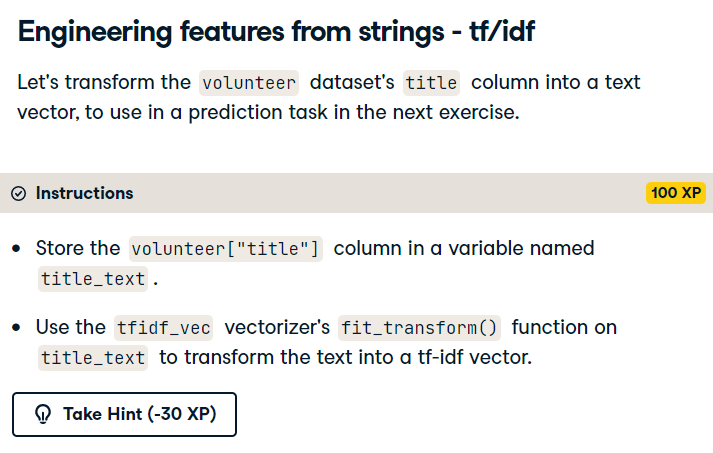

In [ ]:
# Take the title text
title_text = volunteer["title"]

# Create the vectorizer method
tfidf_vec = TfidfVectorizer()

# Transform the text into tf-idf vectors
text_tfidf = tfidf_vec.fit_transform(title_text)

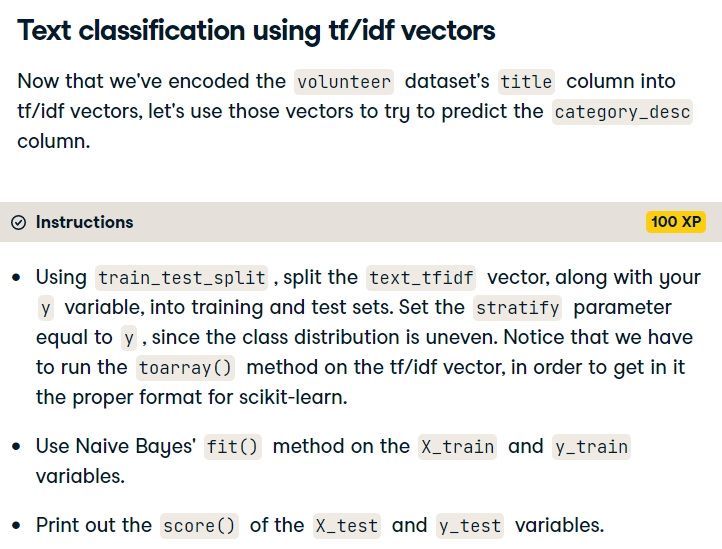

In [ ]:
# Split the dataset according to the class distribution of category_desc
y = volunteer["category_desc"]
X_train, X_test, y_train, y_test = train_test_split(text_tfidf.toarray(), y, stratify=y)

# Fit the model to the training data
nb.fit(X_train, y_train)

# Print out the model's accuracy
print(nb.score(X_test, y_test))

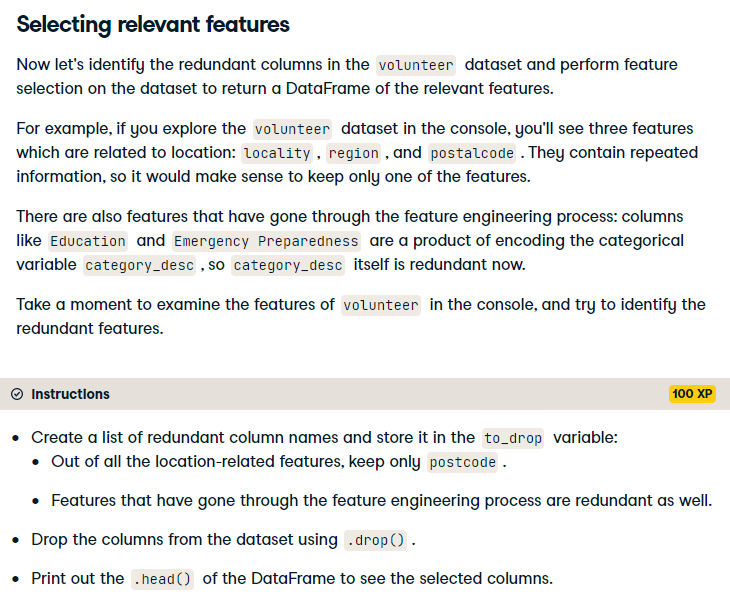

In [ ]:
# Create a list of redundant column names to drop
to_drop = ["category_desc", "created_date", "locality", "region", "vol_requests"]

# Drop those columns from the dataset
volunteer_subset = volunteer.drop(to_drop, axis=1)

# Print out the head of the new dataset
print(volunteer_subset.head())

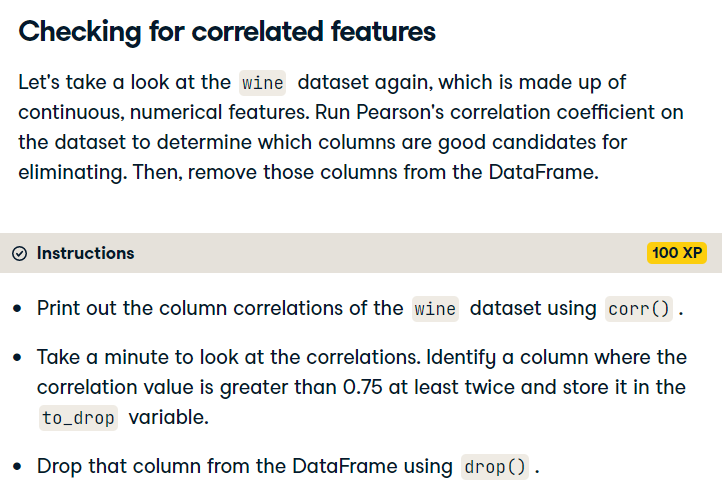

In [ ]:
# Print out the column correlations of the wine dataset
print(wine.corr())

# Take a minute to find the column where the correlation value is greater than 0.75 at least twice
to_drop = "Flavanoids"

# Drop that column from the DataFrame
wine = wine.drop(to_drop, axis=1)

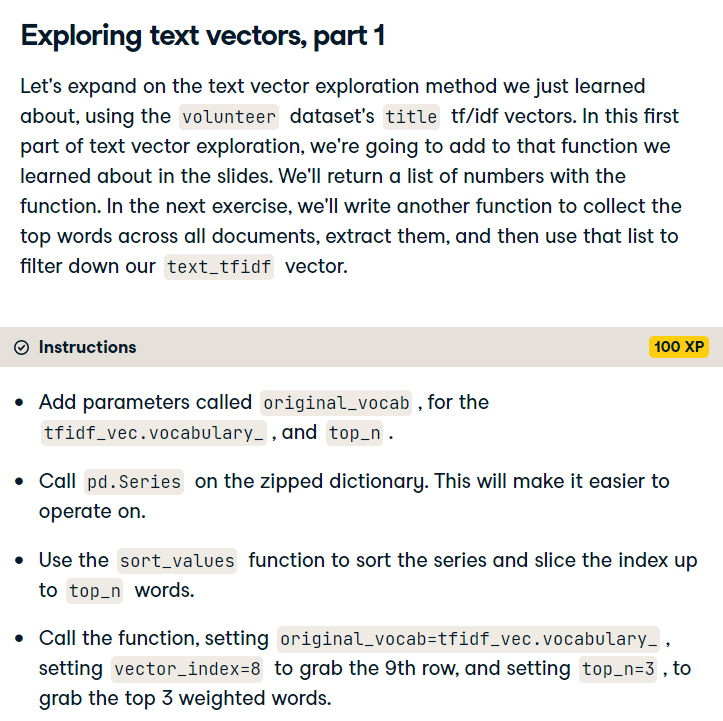

In [ ]:
# Add in the rest of the parameters
def return_weights(vocab, original_vocab, vector, vector_index, top_n):
    zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))

    # Let's transform that zipped dict into a series
    zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})

    # Let's sort the series to pull out the top n weighted words
    zipped_index = zipped_series.sort_values(ascending=False)[:top_n].index
    return [original_vocab[i] for i in zipped_index]

# Print out the weighted words
print(return_weights(vocab, tfidf_vec.vocabulary_, text_tfidf, 8, 3))

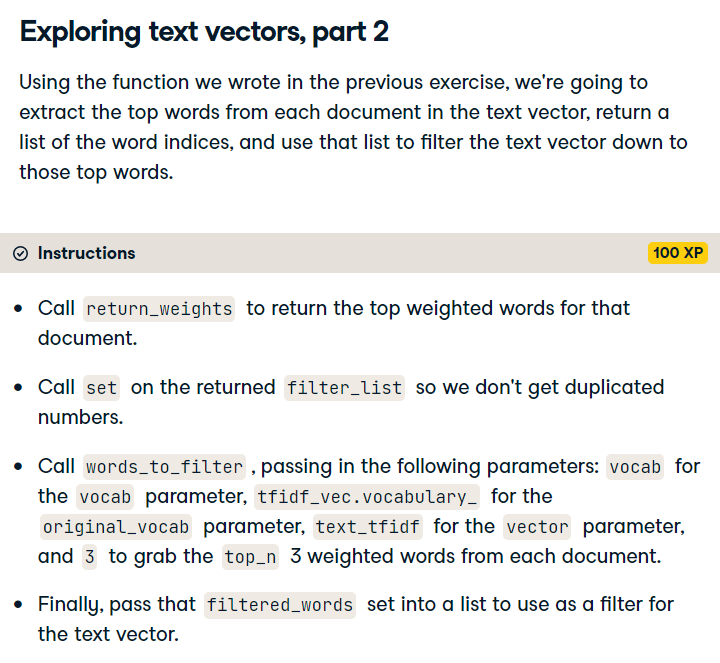

In [ ]:
def words_to_filter(vocab, original_vocab, vector, top_n):
    filter_list = []
    for i in range(0, vector.shape[0]):

        # Here we'll call the function from the previous exercise, and extend the list we're creating
        filtered = return_weights(vocab, original_vocab, vector, i, top_n)
        filter_list.extend(filtered)
    # Return the list in a set, so we don't get duplicate word indices
    return set(filter_list)

# Call the function to get the list of word indices
filtered_words = words_to_filter(vocab, tfidf_vec.vocabulary_, text_tfidf, 3)

# By converting filtered_words back to a list, we can use it to filter the columns in the text vector
filtered_text = text_tfidf[:, list(filtered_words)]

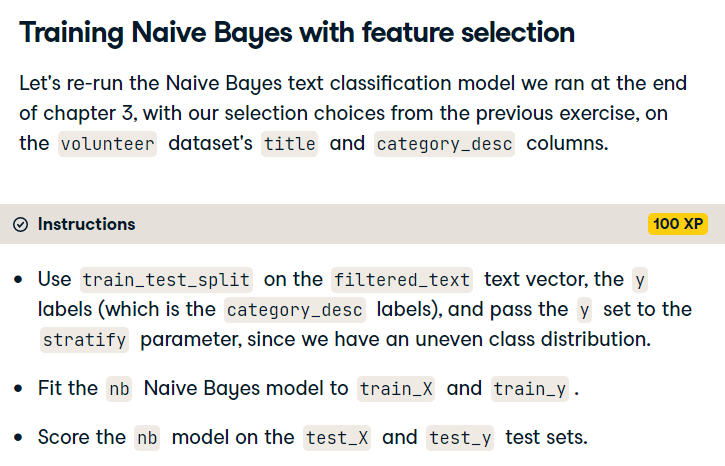

In [ ]:
# Split the dataset according to the class distribution of category_desc
train_X, test_X, train_y, test_y = train_test_split(filtered_text.toarray(), y, stratify=y)

# Fit the model to the training data
nb.fit(train_X, train_y)

# Print out the model's accuracy
print(nb.score(test_X, test_y))

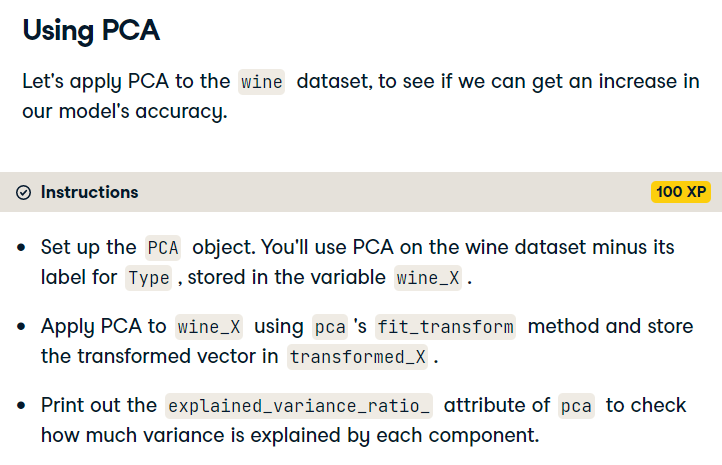

In [ ]:
from sklearn.decomposition import PCA

# Set up PCA and the X vector for diminsionality reduction
pca = PCA()
wine_X = wine.drop("Type", axis=1)

# Apply PCA to the wine dataset
transformed_X = pca.fit_transform(wine_X)

# Look at the percentage of variance explained by the different components
print(pca.explained_variance_ratio_)

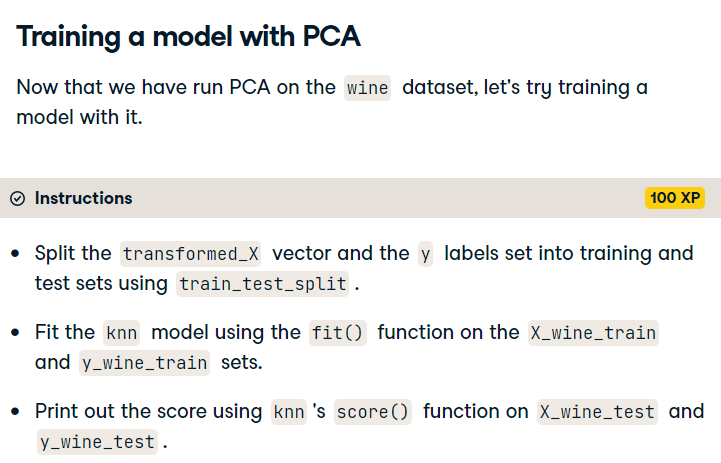

In [ ]:
# Split the transformed X and the y labels into training and test sets
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(transformed_X, y)

# Fit knn to the training data
knn.fit(X_wine_train, y_wine_train)

# Score knn on the test data and print it out
print(knn.score(X_wine_test, y_wine_test))

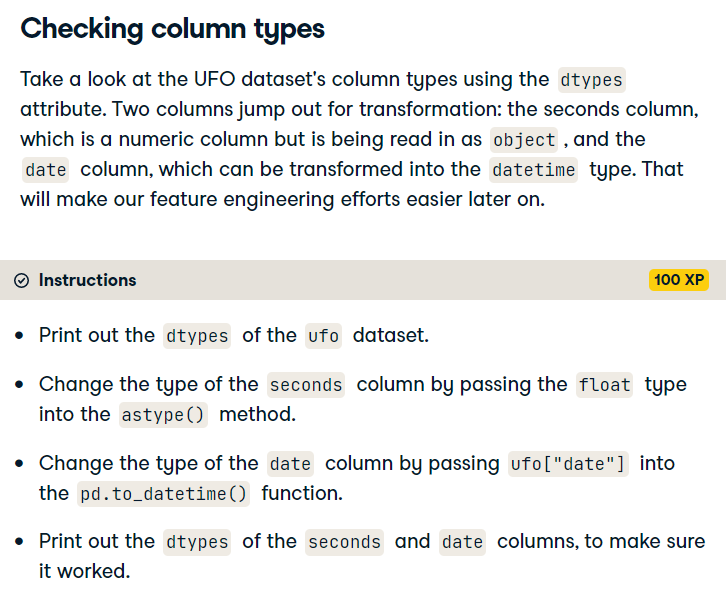

In [ ]:
# Check the column types
print(ufo.dtypes)

# Change the type of seconds to float
ufo["seconds"] = ufo["seconds"].astype(float)

# Change the date column to type datetime
ufo["date"] = pd.to_datetime(ufo["date"])

# Check the column types
print(ufo[["seconds", "date"]].dtypes)

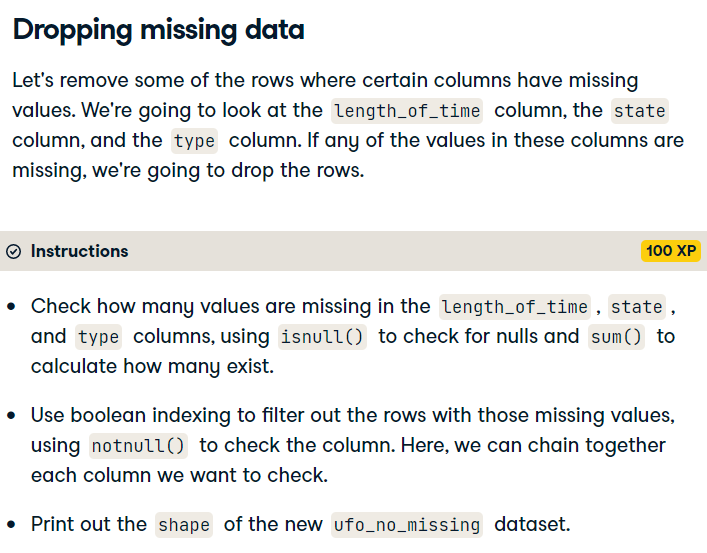

In [ ]:
# Check how many values are missing in the length_of_time, state, and type columns
print(ufo[["length_of_time", "state", "type"]].isnull().sum())

# Keep only rows where length_of_time, state, and type are not null
ufo_no_missing = ufo[ufo["length_of_time"].notnull() &
          ufo["state"].notnull() &
          ufo["type"].notnull()]

# Print out the shape of the new dataset
print(ufo_no_missing.shape)

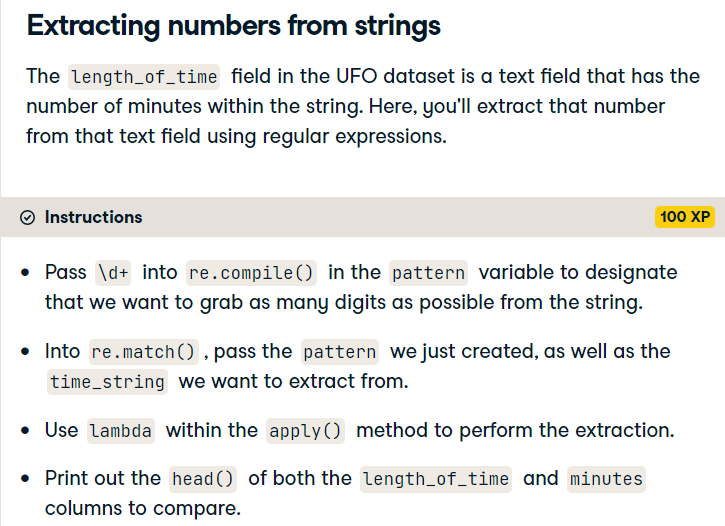

In [ ]:
def return_minutes(time_string):

    # We'll use \d+ to grab digits and match it to the column values
    pattern = re.compile(r"\d+")

    # Use match on the pattern and column
    num = re.match(pattern, time_string)
    if num is not None:
        return int(num.group(0))

# Apply the extraction to the length_of_time column
ufo["minutes"] = ufo["length_of_time"].apply(return_minutes)

# Take a look at the head of both of the columns
print(ufo[["length_of_time", "minutes"]].head())

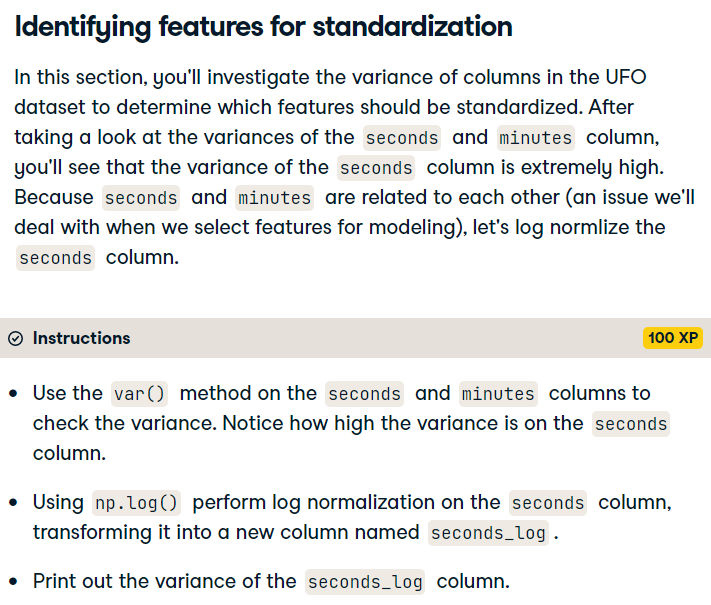

In [ ]:
# Check the variance of the seconds and minutes columns
print(ufo[["seconds", "minutes"]].var())

# Log normalize the seconds column
ufo["seconds_log"] = np.log(ufo["seconds"])

# Print out the variance of just the seconds_log column
print(ufo["seconds_log"].var())

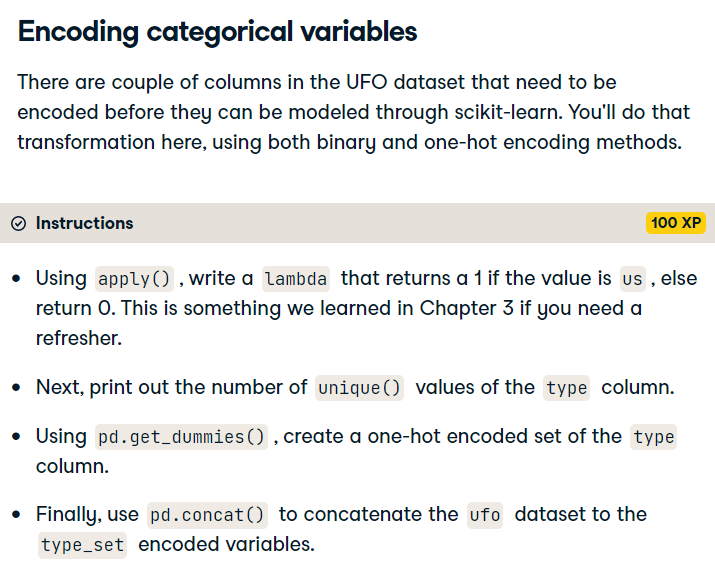

In [ ]:
# Use Pandas to encode us values as 1 and others as 0
ufo["country_enc"] = ufo["country"].apply(lambda val: 1 if val == "us" else 0)

# Print the number of unique type values
print(len(ufo["type"].unique()))

# Create a one-hot encoded set of the type values
type_set = pd.get_dummies(ufo["type"])

# Concatenate this set back to the ufo DataFrame
ufo = pd.concat([ufo, type_set], axis=1)

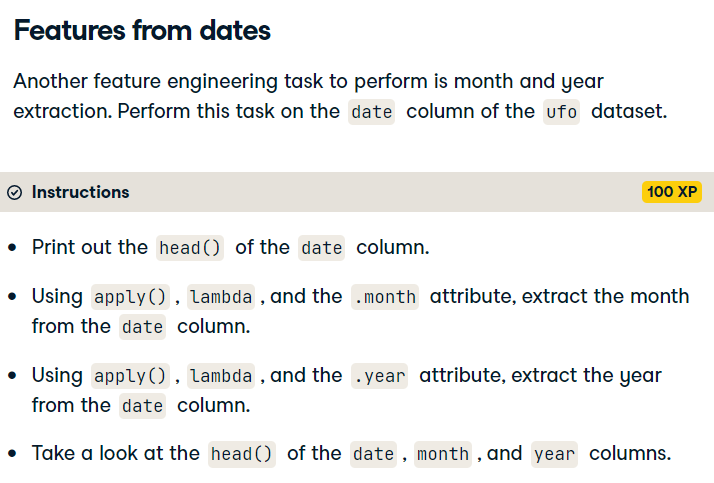

In [ ]:
# Look at the first 5 rows of the date column
print(ufo["date"].head())

# Extract the month from the date column
ufo["month"] = ufo["date"].apply(lambda row: row.month)

# Extract the year from the date column
ufo["year"] = ufo["date"].apply(lambda row: row.year)

# Take a look at the head of all three columns
print(ufo[["date", "month", "year"]].head())

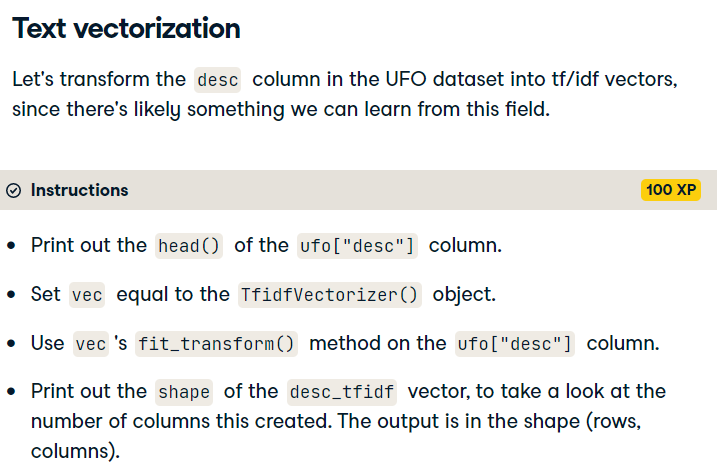

In [ ]:
# Take a look at the head of the desc field
print(ufo["desc"].head())

# Create the tfidf vectorizer object
vec = TfidfVectorizer()

# Use vec's fit_transform method on the desc field
desc_tfidf = vec.fit_transform(ufo["desc"])

# Look at the number of columns this creates.
print(desc_tfidf.shape)

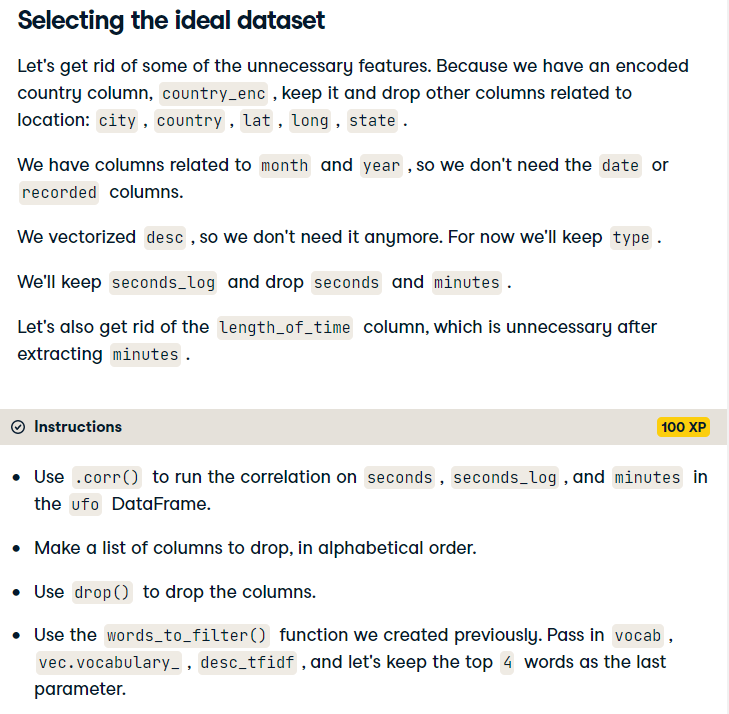

In [ ]:
# Check the correlation between the seconds, seconds_log, and minutes columns
print(ufo[["seconds", "seconds_log", "minutes"]].corr())

# Make a list of features to drop
to_drop = ["city", "country", "date", "desc", "lat", "length_of_time", "long", "minutes", "recorded", "seconds", "state"]

# Drop those features
ufo_dropped = ufo.drop(to_drop, axis=1)

# Let's also filter some words out of the text vector we created
filtered_words = words_to_filter(vocab, vec.vocabulary_, desc_tfidf, 4)

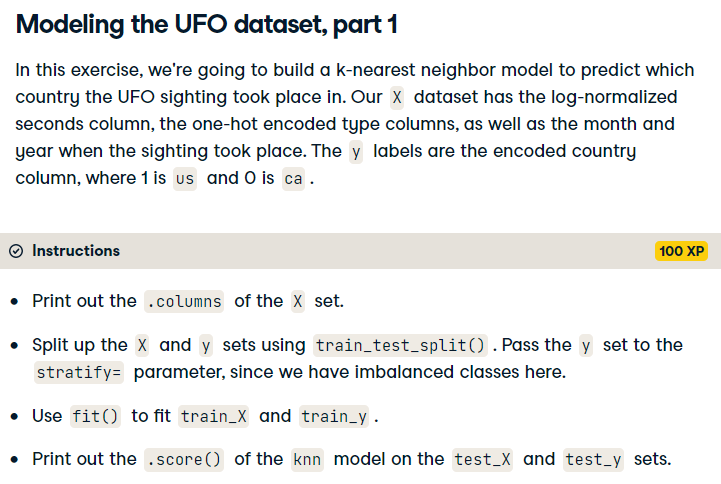

In [ ]:
# Take a look at the features in the X set of data
print(X.columns)

# Split the X and y sets using train_test_split, setting stratify=y
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y)

# Fit knn to the training sets
knn.fit(train_X, train_y)

# Print the score of knn on the test sets
print(knn.score(test_X, test_y))

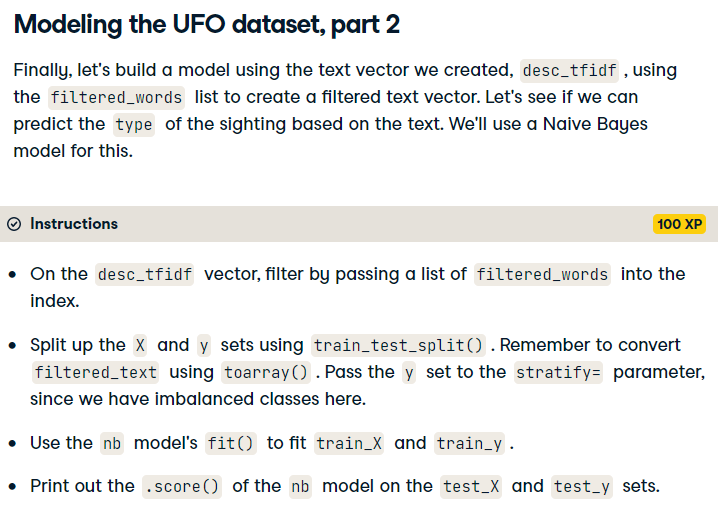

In [ ]:
# Use the list of filtered words we created to filter the text vector
filtered_text = desc_tfidf[:, list(filtered_words)]

# Split the X and y sets using train_test_split, setting stratify=y
train_X, test_X, train_y, test_y = train_test_split(filtered_text.toarray(), y, stratify=y)

# Fit nb to the training sets
nb.fit(train_X, train_y)

# Print the score of nb on the test sets
print(nb.score(test_X, test_y))